# Visualize top European airports from OpenStreetMap with Python tools

#### OpenStreetMap data can be found here: https://www.openstreetmap.org/

In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

In [3]:
icaos = [
    "EGLL",  # Heathrow Airport
    "LFPG",  # Charles de Gaulle Airport
    "EHAM",  # Amsterdam Airport Schiphol
    "EDDF",  # Frankfurt am Main Airport
    "LEMD",  # Adolfo Suárez Madrid–Barajas Airport
    "LEBL",  # Josep Tarradellas Barcelona–El Prat Airport
    "LTFM",  # Istanbul Airport
    "UUEE",  # Sheremetyevo International Airport
    "EDDM",  # Munich Airport
    "EGKK",  # Gatwick Airport
    "LIRF",  # Leonardo da Vinci–Fiumicino Airport
    "LFPO",  # Orly Airport
    "LOWW",  # Vienna International Airport
    "LSZH",  # Zurich Airport
    "LPPT",  # Lisbon Airport
    "EKCH",  # Copenhagen Airport
]

#### <br> Use OSMnx Python package to access to OSM data from ICAO codes

In [4]:
runway = '["aeroway"~"runway"]'
taxiway = '["aeroway"~"taxiway"]'
others = '["aeroway"~"apron|gate|hangar|taxilane|terminal|parking_position|holding_position|stopway"]'
# you can find other tags linked to airports here: https://wiki.openstreetmap.org/wiki/Key:aeroway


def get_graph(place, filter):
    return ox.graph_from_place(
        place,
        simplify=False,
        retain_all=True,
        truncate_by_edge=True,
        buffer_dist=1000,
        custom_filter=filter,
    )


def plot_graph(ax, G, edge_color, edge_linewidth, show=False):
    ox.plot_graph(
        G,
        ax=ax,
        bgcolor="black",
        edge_color=edge_color,
        edge_linewidth=edge_linewidth,
        node_size=0,
        show=show,
    )
    return

In [5]:
def add_image(ax, place):
    G1 = get_graph(place, runway)
    plot_graph(ax, G1, "yellow", 5)
    G2 = get_graph(place, taxiway)
    plot_graph(ax, G2, "white", 2)
    G3 = get_graph(place, others)
    plot_graph(ax, G3, "grey", 1)

#### <br> Plot all aiports with Matplotlib

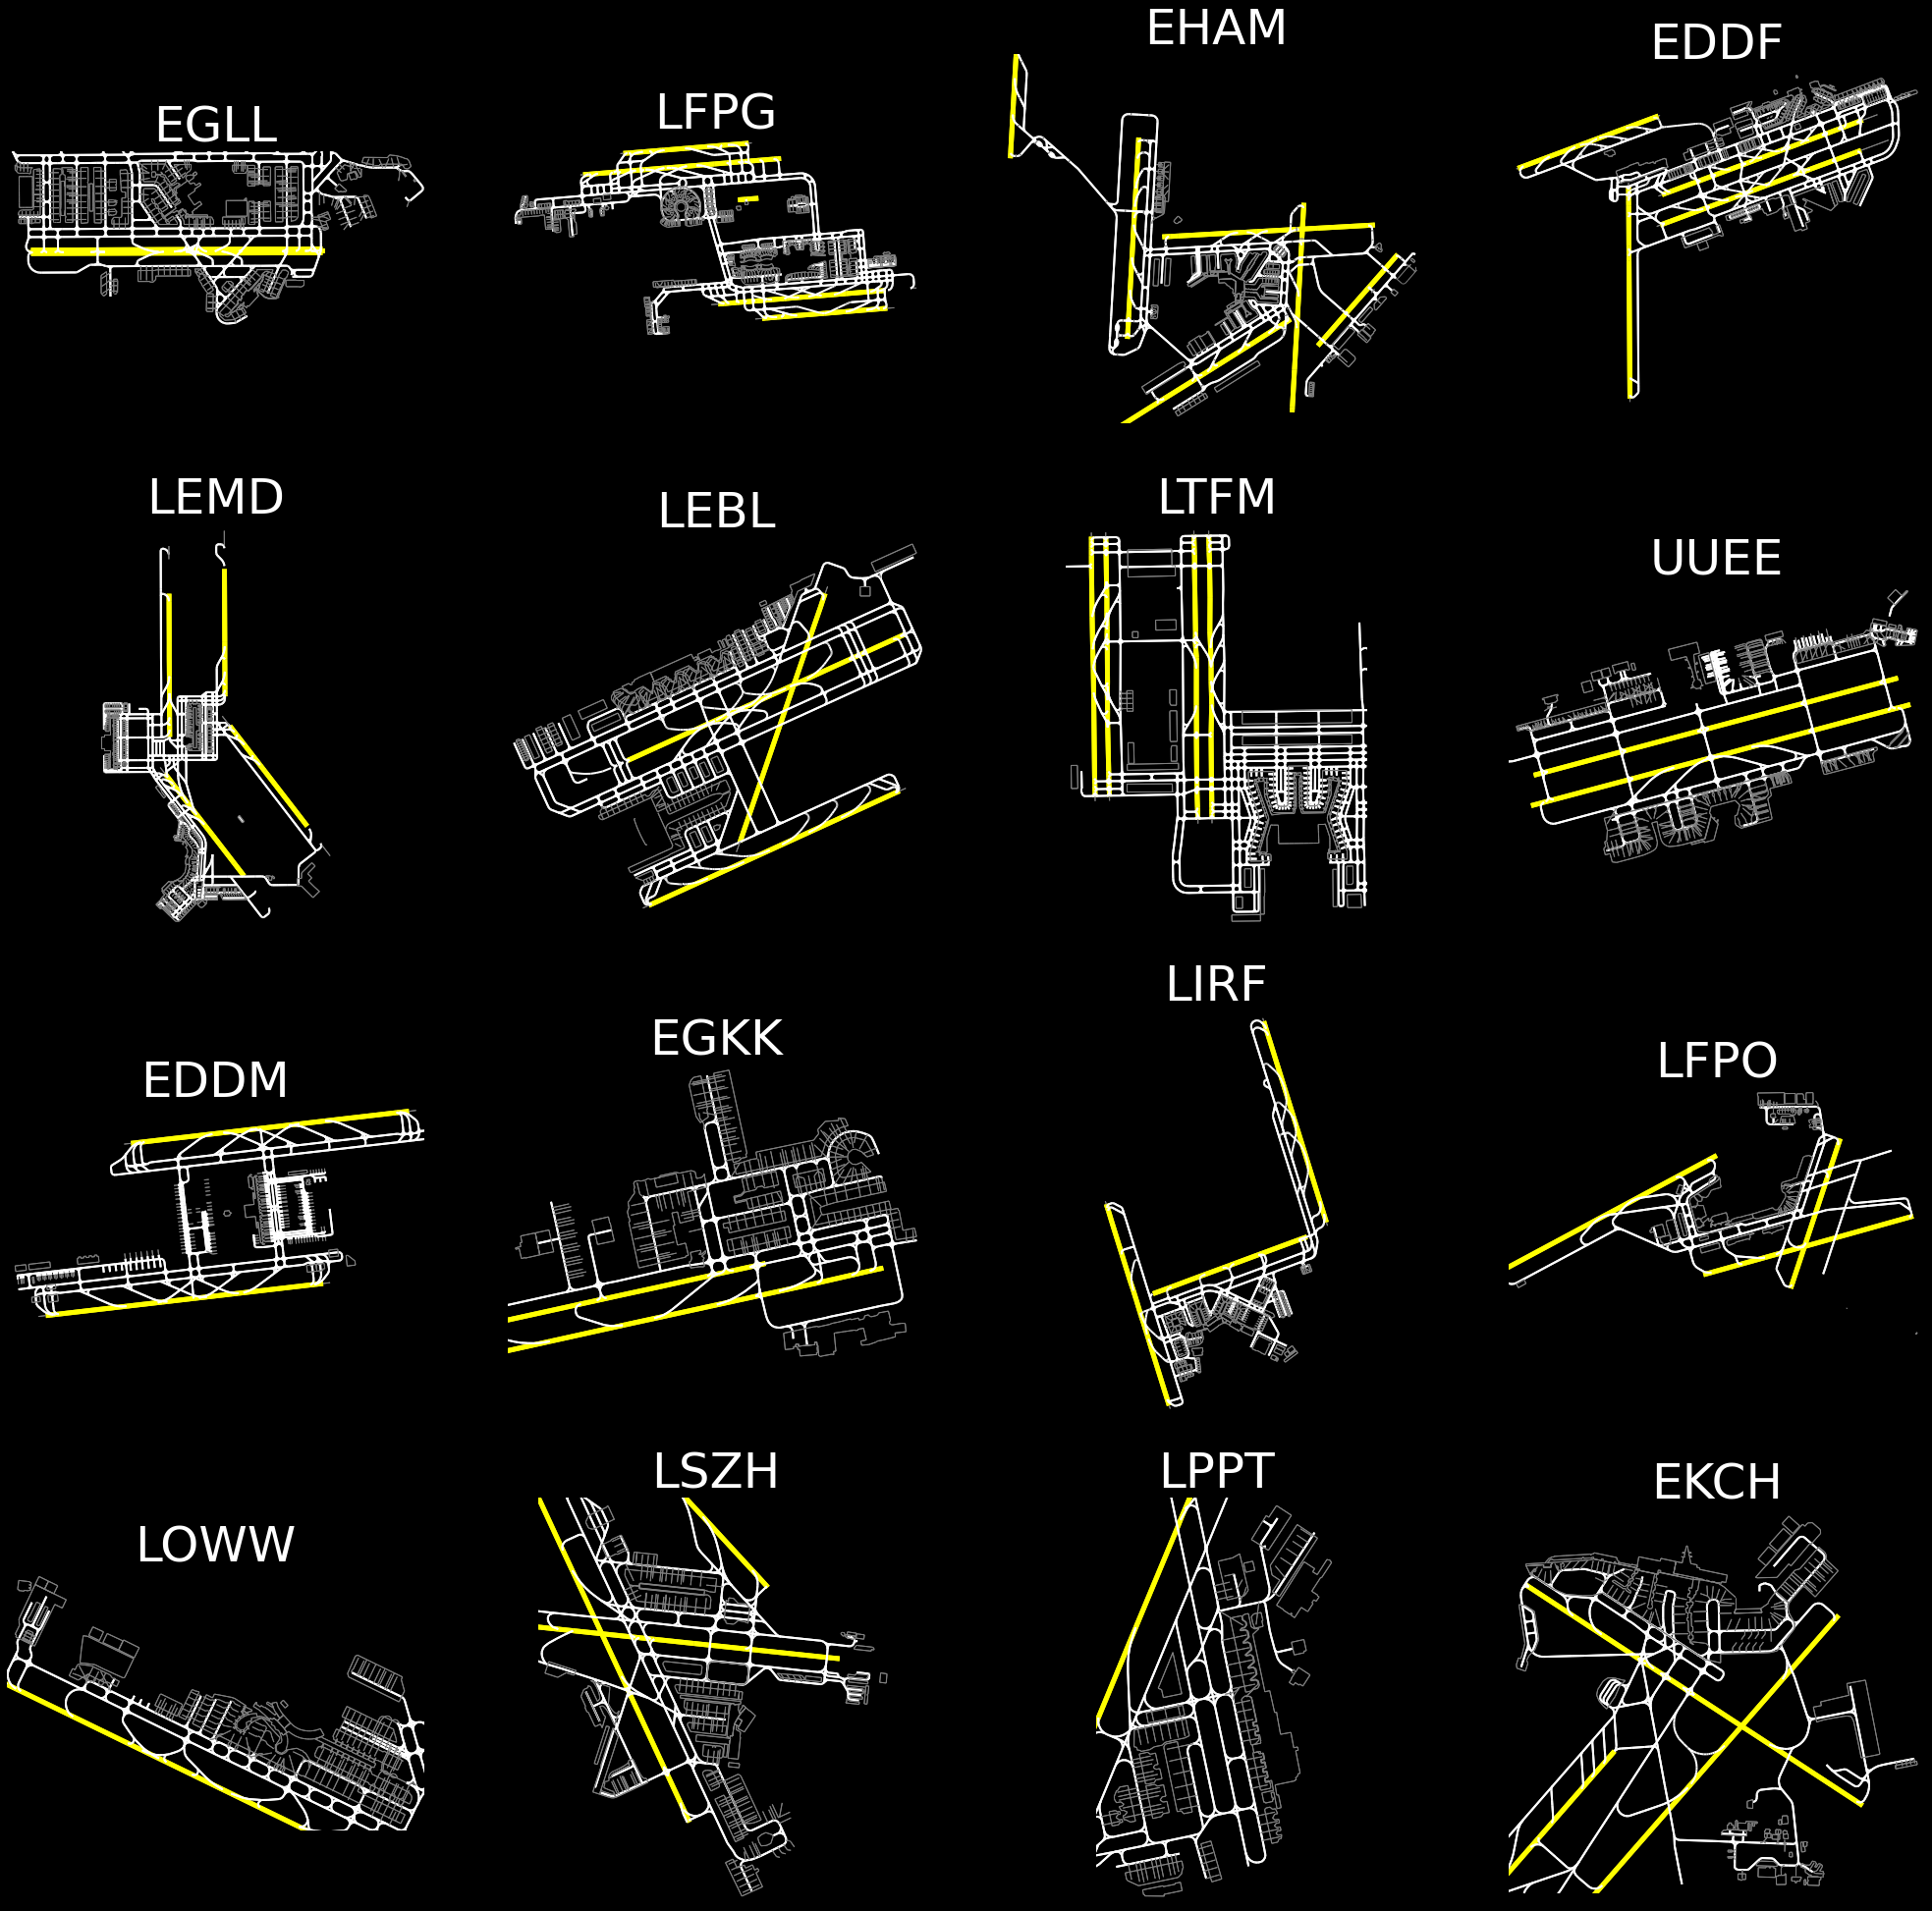

In [6]:
plt.rcParams.update({"figure.max_open_warning": 0})
plt.rcParams["axes.facecolor"] = "black"
plt.rcParams["savefig.facecolor"] = "black"
plt.rcParams["figure.facecolor"] = "black"
plt.rcParams["axes.titlesize"] = 50
plt.rcParams["axes.titlecolor"] = "white"

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(35, 35))

for ax, ap in zip(axs.flat, icaos):
    add_image(ax, ap)
    ax.set_title(ap)

plt.savefig("eur_airports.png", dpi=300, bbox_inches="tight")
plt.savefig("eur_airports.pdf", dpi=300, bbox_inches="tight")
plt.show()